## Problems Solved

The problem that our project seeks to investigate is temporal trends in the duration of top-hit songs from 2000 to 2019, using the "Top Hits Spotify from 2000–2019" dataset available on Kaggle. (https://www.kaggle.com/datasets/paradisejoy/top-hits-spotify-from-20002019) our project will address potential cultural and economic factors influencing song production, including the shortening of attention spans in the digital age and the influence of streaming platforms, which may favor shorter tracks to maximize play counts and revenue. By examining the changes in average song duration over time, this analysis will strive to uncover patterns that reflect shifts in music consumption and production trends. We can analyze an artist's contribution to making a song a hit. For example, whether having a contributing artist is more likely to make a song popular, or whether a remix of an original song, a radio edit, or a change in genre with an added artist is more likely to boost the popularity of a song. We can analyze the evolution of music and its genres. For example, how have the genres of music evolved, and do earlier generations tend to prefer categories such as classical music?

## Attributes in the dataset.

The dataset consists of audio and metadata features for the top-hit songs on Spotify between 2000 and 2019. Each row in the dataset represents a unique song entry and includes the following fields: 

* *song (string):* The name of track.
* *artist (string):* The name of the artist. 
* *duration_ms (integer):* Duration of the track in milliseconds.
* *explicit (string):* The lyrics or content of a track contains onre or more of the criteria which could be considered offensive for children. 
* *year (integer):* Release year of the track. 
* *popularity (integer):* The higher the value the more popular the song is. 
* *danceability (float):* Describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm, beat, and overall regularity on a scale from 0.0 to 1.0. 
* *energy (float):* Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. 
* *key (integer):* The key the track is in. 
* *loudness (integer):* The overall loudness of a track in decibles (dB).  
* *mode (integer):* Mode indicates the modality (major or minor) of a track, where major is represented by 1 and minor is 0. 
* *speechiness (float):* Speechiness detects the presence of spoken words in a track. The more exclusievly speech-like recording, the closer to 1.0. 
* *acousticness (float):* A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 
* *instrumentalness (float):* Predicts whether a track contains no vocals. 
* *liveness (integer):* Detects the presence of an audience in the recording. 
* *valence (integer):* A measure from 0.0 to 1.0 describing the musical positvness converyed by a track.  
* *tempo (float):* The overall estimated tempo of a track in beats per minute (BPM). 
* *genre (string):* Genre of the track. 

## Noise in the dataset.

### Initially check for missing values and decide how to address them.

In [1]:
import pandas as pd
dataframe_1 = pd.read_csv('songs_normalize.csv')
dataframe_1.isnull().sum().sort_values(ascending=False)

artist              0
song                0
tempo               0
valence             0
liveness            0
instrumentalness    0
acousticness        0
speechiness         0
mode                0
loudness            0
key                 0
energy              0
danceability        0
popularity          0
year                0
explicit            0
duration_ms         0
genre               0
dtype: int64

#### Since there are no missing values. This does not need to be addressed.

### Next check for duplicates we can remove identical rows of data since this could skew results if any machine learning algorithm is applied.

In [2]:
dataframe_filtered = dataframe_1.drop_duplicates()
duplicate_rows = len(dataframe_1) - (len(dataframe_filtered)) 
print(duplicate_rows)

59


#### There seem to be 59 duplicate rows these could be eliminated to remove any potential bias.

In [3]:
# skim through the data
# for column in dataframe_1.columns:
#     print(f"\nColumn: {column}")
#     print(dataframe_1[column].unique())

print(dataframe_1.dtypes)


artist               object
song                 object
duration_ms           int64
explicit               bool
year                  int64
popularity            int64
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
genre                object
dtype: object


#### There seems to be no issue with the data types in the data frame as they seem to match exactly with the data types for each column. 

In [4]:
# Gives a summary of the overall unique values
dataframe_filtered.nunique()

artist               835
song                1879
duration_ms         1793
explicit               2
year                  23
popularity            76
danceability         565
energy               580
key                   12
loudness            1671
mode                   2
speechiness          837
acousticness        1208
instrumentalness     772
liveness             783
valence              760
tempo               1831
genre                 59
dtype: int64

### Analyzing the outliers in the continuous numerical variables is important since these outliers can be inconsistent data points. 

Text(0.5, 1.0, 'Box Plot of Loudness')

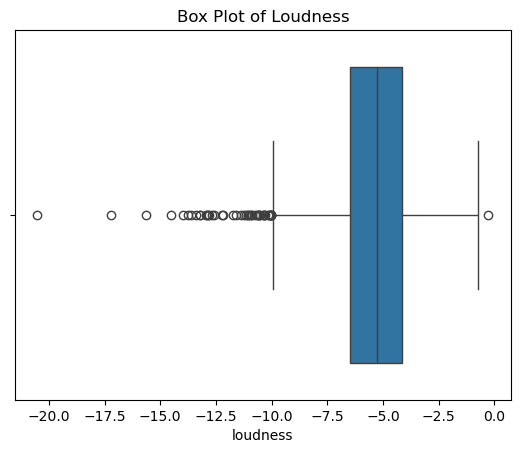

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(x=dataframe_filtered['loudness'])
plt.title("Box Plot of Loudness")

# There seems to be quite a less number of songs with a loudness scale less than - 10.39. There is a possibility for these to be inaccurate. 

### Some names contain characters that go beyond the 26 English letters. E. g. - *NSYNC, 'DJ Ötzi, P!nk, Panic! At The Disco, Axwell /\\ Ingrosso, 21 Savage

This could be harmless, however there are instances that this could become problematic depending on the type of analysis performed. E. g. - 'Seek Bromance - Aviciiâ€™s Vocal Edit', 'Gangnam Style (ê°•ë‚¨ìŠ¤íƒ€ì¼)', 'Years - ãƒ©ã‚¸ã‚ªãƒ»ã‚¨ãƒ‡ã‚£ãƒƒãƒˆ', 'Lean On (feat. MÃ˜ & DJ Snake)', 'BeyoncÃ©', 'Cold Water (feat. Justin Bieber & MÃ˜)', 'ReggaetÃ³n Lento (Remix)', 'CorazÃ³n (feat. Nego do Borel)', 'Ã‰chame La Culpa'.

This could be the correct name like - \*NSYNC or could be used as a filter E. g.- 'F\*\*kin' Perfect', 'Ni\*\*as In Paris', 'Work B\*\*ch' 'F\*\*kin' Problems (feat. Drake, 2 Chainz & Kendrick Lamar)', 'Hot N\*gga'

#### Addressing this could resolve any issues that can arise from the text encoding format that is used. 

### Genre is another column that requires attention. 

Categories such as pop and rock seem to appear in most of the places tagged along with other genres. E. g. - Just 'pop', 'World/Traditional, rock, pop', 'hip hop, rock, pop'

#### Some songs seem to contain versions that seem to have switched from one genre to another. E. g. - 'Another Day in Paradise - R&B-Version' This needs to be addressed. Eg - Breaking all these tags into individual subgroups and expanding the dataset which could be helpful for more complex analysis or getting all Pop songs under one broader tag could simplify the work.

#### This can be used to address the potential inconsistencies that can be caused by the genre of the movie.

### Song name contains featuring artists attached to the name. It is important to filter out the names of featured artists since featuring artists could directly impact the popularity of a song. E. g. - 'Loyal (feat. Lil Wayne & Tyga)'

Filtering a featured artists can become problematic since not all of these are enclosed in brackets. E. g. - 'Finesse - Remix; feat. Cardi B'

#### We can also remove the name of contributing artists to focus solely on the name of the track. This can be vital in reducing inconsistencies that can be caused from the name of the song or an inconsistency that could be caused by the name of the artist. 

### Some names include a different version of the same song. E. g.- 'Get Lucky (feat. Pharrell Williams & Nile Rodgers) - Radio Edit' Radio Edit means that there could be an original version of the same song. Eg - 'Bounce With Me (feat. Xscape) - Edited Album Version' Cases like edited album version also make the dataset noisier.

This can also be helpful to isolate songs with similar names having another version. Removing this could get the original name of a track and compare the success of an original track with a changed version of the track.

### The vocals of the songs could also originate from different languages. E. g. - 'The Ketchup Song (AserejÃ©) - Spanglish Version'

This can help determine the language of a song, however, since most of the songs do not have a clear indication of the language the language of the vocals cannot be accurately predicted. 

## Feature engineering opportunities.

### Extracting the featuring artists from the name of the song is important in analyzing the contribution of a given artist. 

### We can also analyze the impact of explicit. How consumers evolved around this and whether audiences tend to prefer music with explicit content in the past or more recent times.

### We should also turn the continuous variable duration_ms into a suitable categorical variable to analyze whether shorter songs are gaining popularity over time. Popularity can also be binned into categorical variables to perform this analysis. 

### There is a possibility of creating complex variables. An index called the calmness index is often defined which is created by dividing the acousticness from energy. 

### Consolidating the release year from an external source and analyzing them with the release date can be helpful since some music tends to take time to become popular while some may become popular in a lower time period. 

### There are a lot of opportunities for categorical encoding to encode the different genres of music before applying machine learning. This could be done after resolving the current issue with labels after breaking them into further subcategories or after consolidating them into broader categories. 

### There are 126 records with popularity equal to zero. We need to analyze whether is this missing data and if so how it will be addressed. Whether we remove them or keep them. 

### We can log transform some of the fields such as energy, tempo, danceability, and loudness. This could be helpful to normalize the continuous variables which could reduce the skewness which could become helpful when performing analysis. 

### Columns like danceability, energy, key, loudness, mode, speechiness, acoustics, instrument, liveness, valence and tempo need to be analyzed for outliers or irrelevant data prior to deciding whether to include them or remove them completely from our analysis. If these columns are entirely irrelevant, we can drop these.

### The shortest song duration is Lil Nas X Old, Town Road at 113000ms and the longest song is Justin Timberlake, Mirrors, 484146. Breaking songs into categories of long and short should be done carefully since this is quite subjective and could differ from one person to another. 